In [66]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Train examples:', len(x_train))
print('Test examples:', len(x_test))

Train examples: 60000
Test examples: 10000


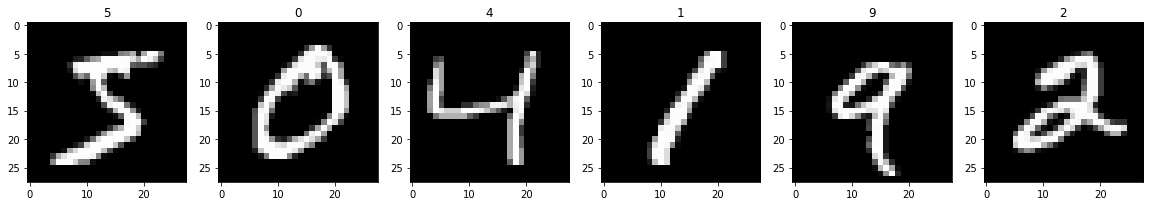

In [67]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))

for i in range(6):
    ax = fig.add_subplot(1, 6, i+1)
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

In [68]:
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [69]:
from keras.utils import np_utils

n_classes = 10
print(y_train[0])
y_train = np_utils.to_categorical(y_train, n_classes)
y_test = np_utils.to_categorical(y_test, n_classes)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [75]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
print(input_shape)
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=2,activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(n_classes, activation='softmax'))
model.summary()

(28, 28, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 512)               1180160   
_________________________________________________________________
dropout_22 (Dropout)         (None, 512)               0        

In [76]:
import keras
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [77]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='best_mnist_cnn_keras.hdf5', verbose=1, save_best_only=True)
model.fit(x_train, y_train, batch_size=128, epochs=15, validation_split=0.2, callbacks=[checkpointer], verbose=2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
 - 48s - loss: 0.3118 - acc: 0.9021 - val_loss: 0.0839 - val_acc: 0.9763

Epoch 00001: val_loss improved from inf to 0.08386, saving model to best_mnist_cnn_keras.hdf5
Epoch 2/15
 - 53s - loss: 0.0798 - acc: 0.9749 - val_loss: 0.0598 - val_acc: 0.9823

Epoch 00002: val_loss improved from 0.08386 to 0.05981, saving model to best_mnist_cnn_keras.hdf5
Epoch 3/15
 - 54s - loss: 0.0534 - acc: 0.9835 - val_loss: 0.0571 - val_acc: 0.9830

Epoch 00003: val_loss improved from 0.05981 to 0.05713, saving model to best_mnist_cnn_keras.hdf5
Epoch 4/15
 - 48s - loss: 0.0400 - acc: 0.9876 - val_loss: 0.0450 - val_acc: 0.9854

Epoch 00004: val_loss improved from 0.05713 to 0.04496, saving model to best_mnist_cnn_keras.hdf5
Epoch 5/15
 - 48s - loss: 0.0314 - acc: 0.9903 - val_loss: 0.0413 - val_acc: 0.9875

Epoch 00005: val_loss improved from 0.04496 to 0.04131, saving model to best_mnist_cnn_keras.hdf5
Epoch 6/15
 - 48s - loss: 0.0254 - acc:

In [78]:
model.load_weights('best_mnist_cnn_keras.hdf5')

In [79]:
score = model.evaluate(x_test, y_test, verbose=0)
print('accuracy: {}'.format(100*score[1]))

accuracy: 99.07000000000001
